Expresión del polinomio interpolante:
P(x) = 0.0000 + (-0.0000)*cos(1x) + (1.0000)*sin(1x) + (-0.0000)*cos(2x) + (0.0000)*sin(2x) + (0.0000)*cos(3x) + (-0.0000)*sin(3x)


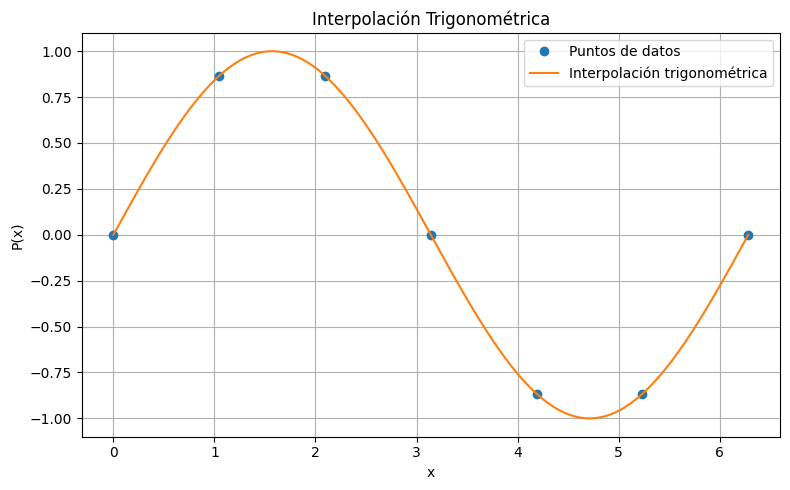

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def interpolacion_trigonometrica(x, y):
    N = len(x)
    n = (N - 1) // 2

    A = np.ones((N, 2*n + 1))
    for i in range(N):
        for k in range(1, n+1):
            A[i, k] = np.cos(k * x[i])
            A[i, n + k] = np.sin(k * x[i])

    coeficientes = np.linalg.solve(A, y)

    def P(x_eval):
        res = coeficientes[0] * np.ones_like(x_eval)
        for k in range(1, n+1):
            res += coeficientes[k] * np.cos(k * x_eval)
            res += coeficientes[n + k] * np.sin(k * x_eval)
        return res

    # Expresión en texto
    expr = f"{coeficientes[0]:.4f}"
    for k in range(1, n+1):
        expr += f" + ({coeficientes[k]:.4f})*cos({k}x)"
        expr += f" + ({coeficientes[n + k]:.4f})*sin({k}x)"

    return P, expr

# Datos de ejemplo
x = np.linspace(0, 2*np.pi, 7)  # 2n + 1 puntos
y = np.sin(x)  # o cualquier otra función o datos

# Interpolación
P, expr = interpolacion_trigonometrica(x, y)

# Mostrar la expresión
print("Expresión del polinomio interpolante:")
print("P(x) =", expr)

# Graficar
x_eval = np.linspace(0, 2*np.pi, 500)
y_eval = P(x_eval)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Puntos de datos')
plt.plot(x_eval, y_eval, '-', label='Interpolación trigonométrica')
plt.title("Interpolación Trigonométrica")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
